![](https://snag.gy/h9Xwf1.jpg)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to `pandas` 2

_Authors: Dave Yerrington (SF)_

---

`pandas` is the most popular python package for managing datasets and is used extensively by data scientists.

### Learning Objectives

- Series axis 1 vs 0
- Understanding Pandas datatypes
- Selection of data
 - Filtering / masking
- Basic Plotting

### Lesson Guide

- [Pandas Indexing](#indexing)
- [Creating DataFrames](#creating_dataframes)
- [Checking Data Types](#dtypes)
- [Renaming and Assignment](#renaming_assignment)
- [Basic `pandas` Plotting](#basic_plotting)
- [Logical Filtering](#filtering)
- [Review](#review)

### There's more to know about Series

There are many operations we can perform on our DataFrames.  Before we step too far into the world of complex transformations, it's important to note the two main aspects of how **series** data can be accessed within a _DataFrame_.

### Axis = 1: Columns

So far we know we can select one, or many column series within brackets `df[series references here]`.  This selector works with columns which are a series.  We can access the columns axis by _column name_, or _numeric index_.
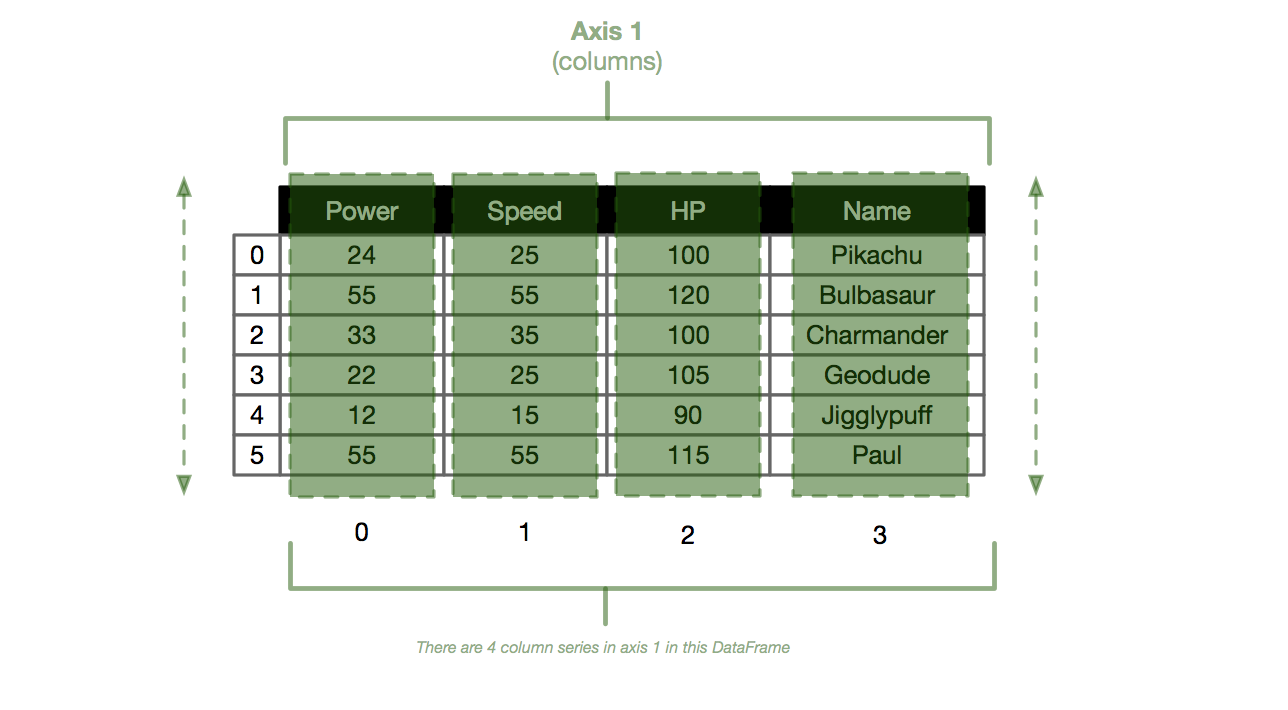

### Axis = 0:  Rows

There are times we might want to access our data by the row element.  As we get into cleaning data and transforming it for the various applications we will be using, this is also another aspect of accessing our _DataFrames_ that we will need to be familliar with.  We can access the rows axis by literal index value (even if it's a string), or by numeric index.  More on this in the near future.

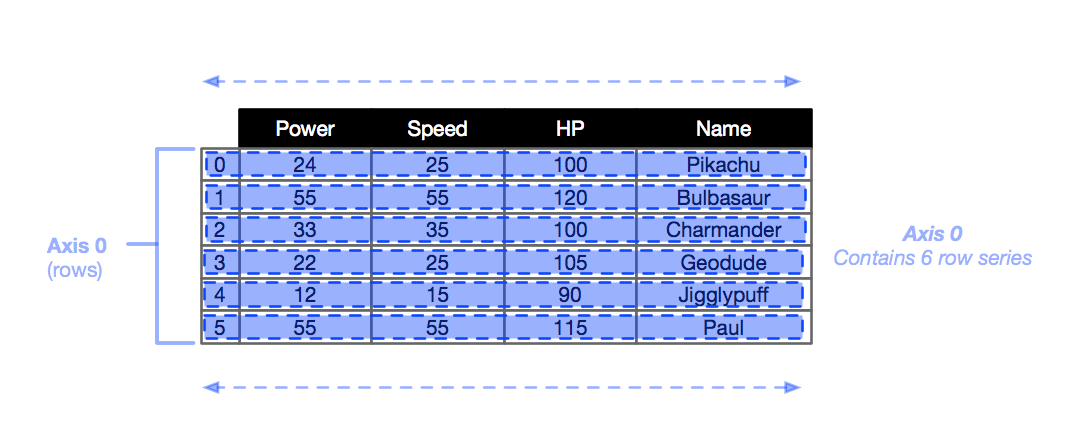

#### What we can do with axis:
- Select series by row (axis 0), or column (axis 1).
- Use `.map()` functions on individual columns (series), or `.apply()` on row or access over the entire DataFrame.
- We can talk to our friends and colleagues about data in a very specific way.

<a id='indexing'></a>

### Pandas Indexing 

---

More often than not, we want to operate on or extract specific portions of our data. When we perform indexing on a DataFrame or Series we can specifying the specific section of the data we want to operate on.

Pandas has three properties that you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns axis.
- **`.iloc`** indexes with the _integer positions_ for rows and columns axis.
> In the newer versions of Pandas `.ix` is now deprecated for those who are familliar with it. **`.ix`** indexes with _both labels and integer positions.  Leaving this here for future reference_.

To help clarify these differences, lets first re-set the row labels to letters using the ```.set_index()``` function (or setting the index property explicity):

In [1]:
import pandas as pd

# Lets load this drug data again.
drug = pd.read_csv("./datasets/drug-use-by-age.csv")

In [11]:
new_index_values = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']
# Update our index to this new set of values:  Is this new_index_values a series?
drug.index = (new_index_values)
drug

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
A     12  2798          3.9                3.0            1.1   
B     13  2757          8.5                6.0            3.4   
C     14  2792         18.1                5.0            8.7   
D     15  2956         29.2                6.0           14.5   
E     16  3058         40.1               10.0           22.5   
F     17  3038         49.3               13.0           28.0   
G     18  2469         58.7               24.0           33.7   
H     19  2223         64.6               36.0           33.4   
I     20  2271         69.7               48.0           34.0   
J     21  2354         83.2               52.0           33.0   
K  22-23  4707         84.2               52.0           28.4   
L  24-25  4591         83.1               52.0           24.9   
M  26-29  2628         80.7               52.0           20.8   
N  30-34  2864         77.5               52.0           16.4   
O  35-49  7391         75.0               52.0           10.4   
P  50-64  3923         67.2               52.0            7.3   
Q    65+  2448         49.3               52.0            1.2   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
A                  4.0          0.1               5.0        0.0   
B                 15.0          0.1               1.0        0.0   
C                 24.0          0.1               5.5        0.0   
D                 25.0          0.5               4.0        0.1   
E                 30.0          1.0               7.0        0.0   
F                 36.0          2.0               5.0        0.1   
G                 52.0          3.2               5.0        0.4   
H                 60.0          4.1               5.5        0.5   
I                 60.0          4.9               8.0        0.6   
J                 52.0          4.8               5.0        0.5   
K                 52.0          4.5               5.0        0.5   
L                 60.0          4.0               6.0        0.5   
M                 52.0          3.2               5.0        0.4   
N                 72.0          2.1               8.0        0.5   
O                 48.0          1.5              15.0        0.5   
P                 52.0          0.9              36.0        0.4   
Q                 36.0          0.0                 -        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
A               -        ...                    0.1                24.5   
B             3.0        ...                    0.1                41.0   
C               -        ...                    0.4                 4.5   
D             9.5        ...                    0.8                 3.0   
E             1.0        ...                    1.1                 4.0   
F            21.0        ...                    1.4                 6.0   
G            10.0        ...                    1.7                 7.0   
H             2.0        ...                    1.5                 7.5   
I             5.0        ...                    1.7                12.0   
J            17.0        ...                    1.3                13.5   
K             5.0        ...                    1.7                17.5   
L             6.0        ...                    1.3                20.0   
M             6.0        ...                    1.2                13.5   
N            15.0        ...                    0.9                46.0   
O            48.0        ...                    0.3                12.0   
P            62.0        ...                    0.4                 5.0   
Q               -        ...                    0.0                   -   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
A               0.2                    52.0            0.2   
B               0.3                    25.5            0.3   
C               0.9                     5.0            0.8   
D         

Using the **`.loc`** indexer, we can pull out the rows **B thru F** and the columns **marijuana-use and marijuana-frequency**.

In [13]:
# ['B','C','D','E','F'], ["marijuana-use", "marijuana-frequency]
# subset = drug.loc[???????]
drug.loc['B':'F']

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
B  13  2757          8.5                6.0            3.4   
C  14  2792         18.1                5.0            8.7   
D  15  2956         29.2                6.0           14.5   
E  16  3058         40.1               10.0           22.5   
F  17  3038         49.3               13.0           28.0   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
B                 15.0          0.1               1.0        0.0   
C                 24.0          0.1               5.5        0.0   
D                 25.0          0.5               4.0        0.1   
E                 30.0          1.0               7.0        0.0   
F                 36.0          2.0               5.0        0.1   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
B             3.0        ...                    0.1                41.0   
C               -        ...                    0.4                 4.5   
D             9.5        ...                    0.8                 3.0   
E             1.0        ...                    1.1                 4.0   
F            21.0        ...                    1.4                 6.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
B               0.3                    25.5            0.3   
C               0.9                     5.0            0.8   
D               2.0                     4.5            1.5   
E               2.4                    11.0            1.8   
F               3.5                     7.0            2.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
B                 4.0       0.1             5.0           0.1   
C                12.0       0.1            24.0           0.2   
D                 6.0       0.3            10.5           0.4   
E                 9.5       0.3            36.0           0.2   
F                 9.0       0.6            48.0           0.5   

  sedative-frequency  
B               19.0  
C               16.5  
D               30.0  
E                3.0  
F                6.5  

[5 rows x 28 columns]

In [14]:
drug.loc['B':'F', ['marijuana-use', 'marijuana-frequency']]

marijuana-use  marijuana-frequency
B            3.4                 15.0
C            8.7                 24.0
D           14.5                 25.0
E           22.5                 30.0
F           28.0                 36.0

We can do the same thing with the **`.iloc`** indexer, but we have to use integers for the location.

In [21]:
# [1,2,3,4,5], [4,5]
# subset = drug.iloc[row_index. column_index]
drug.iloc[:,5:10]

marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
A                  4.0          0.1               5.0        0.0   
B                 15.0          0.1               1.0        0.0   
C                 24.0          0.1               5.5        0.0   
D                 25.0          0.5               4.0        0.1   
E                 30.0          1.0               7.0        0.0   
F                 36.0          2.0               5.0        0.1   
G                 52.0          3.2               5.0        0.4   
H                 60.0          4.1               5.5        0.5   
I                 60.0          4.9               8.0        0.6   
J                 52.0          4.8               5.0        0.5   
K                 52.0          4.5               5.0        0.5   
L                 60.0          4.0               6.0        0.5   
M                 52.0          3.2               5.0        0.4   
N                 72.0          2.1               8.0        0.5   
O                 48.0          1.5              15.0        0.5   
P                 52.0          0.9              36.0        0.4   
Q                 36.0          0.0                 -        0.0   

  crack-frequency  
A               -  
B             3.0  
C               -  
D             9.5  
E             1.0  
F            21.0  
G            10.0  
H             2.0  
I             5.0  
J            17.0  
K             5.0  
L             6.0  
M             6.0  
N            15.0  
O            48.0  
P            62.0  
Q               -

If we you index the rows or columns with integers using **`.loc`**, you will get an error.

##### How can we reference the variables "age" and "crack-use", but only rows "C" and "F"?

In [32]:
# A:
drug.loc[['C','F'],['age','crack_use']]

/anaconda3/envs/GAdsi/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


age  crack_use
C  14        NaN
F  17        NaN

In [35]:
drug.iloc[[2,5],[0,8]]

age  crack-use
C  14        0.0
F  17        0.1

In [25]:
drug.loc[['B','F'], ['marijuana-use','marijuana-frequency']]

marijuana-use  marijuana-frequency
B            3.4                 15.0
F           28.0                 36.0

<a id='creating_dataframes'></a>

### Creating DataFrames

---

The simplest way to create your own dataframe when not importing from a file is to give the ```pd.DataFrame()``` instantiator a dictionary.

In [37]:
raw_data = {
    'Letters':  ['A','B','C'], 
    'Integers': [1,2,3], 
    'Floats':   [2.2, 3.3, 4.4]
}

mydata = pd.DataFrame(raw_data)

In [38]:
# Check it out
mydata

Letters  Integers  Floats
0       A         1     2.2
1       B         2     3.3
2       C         3     4.4

As you might expect, the dictionary needs to have lists of values that are all the same length. The keys correspond to the names of the columns and the values correspond to the data in the columns.

<a id='dtypes'></a>

### Examining data types

---

Pandas comes with a useful property to look at just the data types of your DataFrame columns. Use ```.dtypes``` on your DataFrame:

In [40]:
# A:
mydata.dtypes

Letters      object
Integers      int64
Floats      float64
dtype: object

In [41]:
#dtypes as filter
mydata.dtypes[mydata.dtypes == "object"]

Letters    object
dtype: object

This will show you what data type each column is. Strings are stored as a type called "object" because they are not guaranteed to take up a set amount of space (strings can be of any length).

#### Can you think of any reasons why you might want to check your dtypes?

<a id='renaming_assignment'></a>

### Renaming and Assignment

---

Pandas makes it easy to change column names and assign values to your DataFrame.

Say we wanted to change the column name "Integers" to "int":

In [43]:
## Check out columns property
mydata.columns

Index(['Letters', 'Integers', 'Floats'], dtype='object')

In [45]:
mydata.rename(columns = {'Integers':'int'})

Letters  int  Floats
0       A    1     2.2
1       B    2     3.3
2       C    3     4.4

In [46]:
mydata

Letters  Integers  Floats
0       A         1     2.2
1       B         2     3.3
2       C         3     4.4

In [47]:
# Use rename function -- reference inline documentation 
# inplace = True updates mydata
print(mydata.columns)

Index(['Letters', 'Integers', 'Floats'], dtype='object')


In [ ]:
# Display DataFrame post-rename operation

If you wanted to change every column name, you could just assign a new list to the ```.columns``` property.

In [49]:
# Rename columns via property to ['A','B','C']
mydata.head()

Letters  Integers  Floats
0       A         1     2.2
1       B         2     3.3
2       C         3     4.4

In [57]:
mydata.columns = ['chars', 'int', 'float']
mydata

chars  int  float
0     A    1    2.2
1     B    2    3.3
2     C    3    4.4

In [54]:
# Select all rows in iloc[:], with columns 0:3, iloc[,0:3]
mydata.iloc[:,0:2]

float  int
0     A    1
1     B    2
2     C    3

In [23]:
# Selecting series with column reference for features 0:3

We can assign values using the indexing that we learned before.

Let's change the newly renamed "B" column at row index 1 to be 100.

In [58]:
# .loc[?, ??]
mydata.loc[1, 'chars']

'B'

Alternatively we can assign multiple values at once with lists.

In [60]:
# mydata.loc[:, 'A'] = [0,0,0]
# print(mydata)

# mydata.loc[0, ['B','C']] = [-1000, 'newstring']
# print(mydata.head())

mydata.loc[0, ['int', 'chars']] = [-1000, 'newstring']
mydata

chars   int  float
0  newstring -1000    2.2
1          B     2    3.3
2          C     3    4.4

<a id='basic_plotting'></a>

### Basic plotting using DataFrames

---

DataFrames also come with some basic convenience functions for plotting data. First import matplotlib and set it to run "inline" in your notebook.

In [61]:
import matplotlib.pyplot as plt

%matplotlib inline

Using our ```drug``` DataFrame again, use the ```.plot()``` function to plot the **age** columns against the **marijuana-use** column.

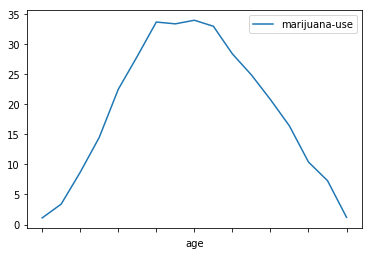

In [65]:
# plot x as age, y as marijuana-use - title="Drug use by age"
drug.plot(x="age", y="marijuana-use")

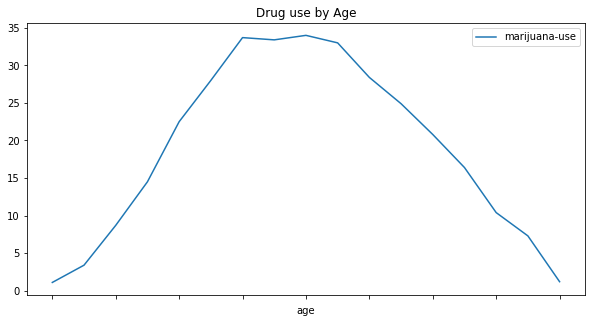

In [66]:
drug.plot(
          x="age", 
          y="marijuana-use",
          title = "Drug use by Age",
          figsize = (10,5)
)

The ```.hist()``` function will create a histogram for a column's values.

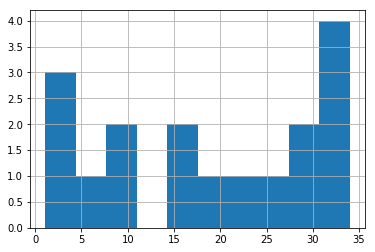

In [68]:
# Plot histogram of feature / variable / column: "marijuana-use"
drug['marijuana-use'].hist()

### Pandas plotting features

It's very handy to be able to plot multiple figures within a single figure.  Since Pandas uses Matplotlib under the hood, it's very useful to combine these tools to get the most out of your plots.

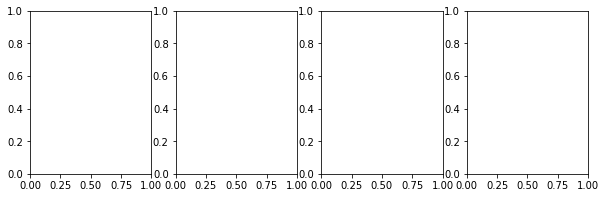

In [71]:
# import matplotlib, setup figure with 1 row and 2 columns - blank
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    nrows = 1,
    ncols = 4,
    figsize = (10,3)
)

Accessing our individual sub-figure plots can be done via `ax[index]` that we defined earlier.

In [72]:
# Same plot as before, but with text features
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1220d14a8>,
      dtype=object)

### Adding our Pandas plots using `ax`

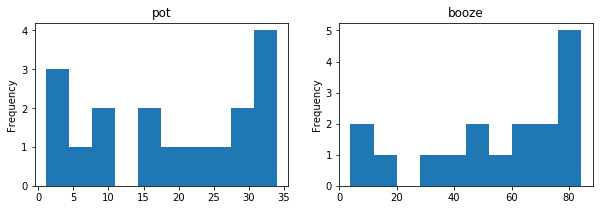

In [74]:
## Plot both line plot and histogram in one figure, from Pandas to Matplotlib
fig, ax = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize = (10,3)
)

drug['marijuana-use'].plot(kind="hist", ax = ax[0], title = "pot")
drug['alcohol-use'].plot(kind="hist", ax = ax[1], title = "booze")

### More than one row

`ax[row, column]`

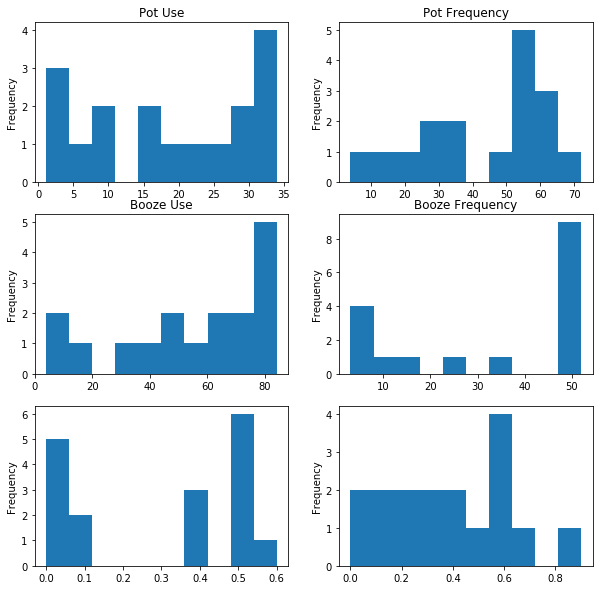

In [82]:
## Demonstrate multiple ax row / column reference
fig, ax = plt.subplots (
    nrows = 3,
    ncols = 2,
    figsize = (10,10)
)

drug["marijuana-use"].plot(kind="hist", ax=ax[0,0], title="Pot Use")
drug["marijuana-frequency"].plot(kind="hist", ax=ax[0,1], title="Pot Frequency")
drug["alcohol-use"].plot(kind="hist", ax=ax[1,0], title="Booze Use")
drug["alcohol-frequency"].plot(kind="hist", ax=ax[1,1], title="Booze Frequency")
drug["crack-use"].plot(kind="hist", ax=ax[2,0])
drug["meth-use"].plot(kind="hist", ax=ax[2,1])

In [39]:
## 3 rows of figures

In [41]:
## 6 plots -- 2x3

<a id='filtering'></a>

### Filtering Logic

---

One of the most powerful features of DataFrames is using logical commands to filter data.

Subset the ```drug``` data for only the rows where marijuana-use is greater than 20.

In [84]:
# A:
drug["marijuana-use"]

A     1.1
B     3.4
C     8.7
D    14.5
E    22.5
F    28.0
G    33.7
H    33.4
I    34.0
J    33.0
K    28.4
L    24.9
M    20.8
N    16.4
O    10.4
P     7.3
Q     1.2
Name: marijuana-use, dtype: float64

In [86]:
mask = drug["marijuana-use"] > 20
mask

A    False
B    False
C    False
D    False
E     True
F     True
G     True
H     True
I     True
J     True
K     True
L     True
M     True
N    False
O    False
P    False
Q    False
Name: marijuana-use, dtype: bool

In [87]:
drug[mask]["marijuana-use"]

E    22.5
F    28.0
G    33.7
H    33.4
I    34.0
J    33.0
K    28.4
L    24.9
M    20.8
Name: marijuana-use, dtype: float64

The ampersand sign can be used to subset where multiple conditions need to be met for each row. 

Subset the data for marijuana use over 20, as before, but now also where the n is greater than 4000.

In [89]:
# A:
mask1 = (drug["marijuana-use"] > 20) & (drug['n'] > 4000)
drug[mask1]

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
K  22-23  4707         84.2               52.0           28.4   
L  24-25  4591         83.1               52.0           24.9   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
K                 52.0          4.5               5.0        0.5   
L                 60.0          4.0               6.0        0.5   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
K             5.0        ...                    1.7                17.5   
L             6.0        ...                    1.3                20.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
K               4.4                    12.0            3.6   
L               4.3                    10.0            2.6   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
K                10.0       0.6            46.0           0.2   
L                10.0       0.7            21.0           0.2   

  sedative-frequency  
K               52.0  
L               17.5  

[2 rows x 28 columns]

In [90]:
mask1 = (drug["marijuana-use"] > 20)|(drug['n'] > 4000)
drug[mask1]

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
E     16  3058         40.1               10.0           22.5   
F     17  3038         49.3               13.0           28.0   
G     18  2469         58.7               24.0           33.7   
H     19  2223         64.6               36.0           33.4   
I     20  2271         69.7               48.0           34.0   
J     21  2354         83.2               52.0           33.0   
K  22-23  4707         84.2               52.0           28.4   
L  24-25  4591         83.1               52.0           24.9   
M  26-29  2628         80.7               52.0           20.8   
O  35-49  7391         75.0               52.0           10.4   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
E                 30.0          1.0               7.0        0.0   
F                 36.0          2.0               5.0        0.1   
G                 52.0          3.2               5.0        0.4   
H                 60.0          4.1               5.5        0.5   
I                 60.0          4.9               8.0        0.6   
J                 52.0          4.8               5.0        0.5   
K                 52.0          4.5               5.0        0.5   
L                 60.0          4.0               6.0        0.5   
M                 52.0          3.2               5.0        0.4   
O                 48.0          1.5              15.0        0.5   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
E             1.0        ...                    1.1                 4.0   
F            21.0        ...                    1.4                 6.0   
G            10.0        ...                    1.7                 7.0   
H             2.0        ...                    1.5                 7.5   
I             5.0        ...                    1.7                12.0   
J            17.0        ...                    1.3                13.5   
K             5.0        ...                    1.7                17.5   
L             6.0        ...                    1.3                20.0   
M             6.0        ...                    1.2                13.5   
O            48.0        ...                    0.3                12.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
E               2.4                    11.0            1.8   
F               3.5                     7.0            2.8   
G               4.9                    12.0            3.0   
H               4.2                     4.5            3.3   
I               5.4                    10.0            4.0   
J               3.9                     7.0            4.1   
K               4.4                    12.0            3.6   
L               4.3                    10.0            2.6   
M               4.2                    10.0            2.3   
O               1.9                     6.0            0.6   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
E                 9.5       0.3            36.0           0.2   
F                 9.0       0.6            48.0           0.5   
G                 8.0       0.5            12.0           0.4   
H                 6.0       0.4           105.0           0.3   
I                12.0       0.9            12.0           0.5   
J                10.0       0.6             2.0           0.3   
K                10.0       0.6            46.0           0.2   
L                10.0       0.7            21.0           0.2   
M                 7.0       0.6            30.0           0.4   
O                24.0       0.2           104.0           0.3   

  sedative-frequency  
E                3.0  
F                6.5  
G               10.0  
H                6.0  
I                4.0  
J                9.0  
K               52.0  
L               17.5  
M                4.0  
O               10.0  

[10 rows x 28 columns]

In [ ]:
# Sorting Demo - quick

#### Time Permitting:  Map + Apply Demo

<a id='review'></a>

### Review

---

 - What is axis 1 vs 0 and how can we use them?
 - How do we slice? Index? Filter?
 - Why might we inspect our datatypes?
 - How do we use Pandas plots with Matplotlib to create multiple sub-figures in a single figure?